# Covid-19 Detection 
In this project, I will try to detect covid-19 depending on x-ray photos.

The first step in working with any dataset is loading the data in and noting what information is included in the dataset. This is an important step in eventually working with this data, and knowing what kinds of features you have to work with as you transform and group the data!


# First Loading and Exploring the Data


In [7]:
import pandas as pd
import os
import shutil

In [34]:
!pip install Keras

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/bin/python -m pip install --upgrade pip' command.


In [36]:
pip install tensorflow

     |████████████████████████████████| 320.4 MB 8.7 kB/s  eta 0:00:015��█               | 171.1 MB 58.1 MB/s eta 0:00:03��█████████████▍              | 174.4 MB 65.7 MB/s eta 0:00:03███████████████           | 210.6 MB 65.7 MB/s eta 0:00:02██████████████████▍   | 284.4 MB 48.5 MB/s eta 0:00:01��██████████████▉ | 308.2 MB 49.5 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 11 kB/s s eta 0:00:01
     |████████████████████████████████| 459 kB 52.3 MB/s eta 0:00:01
     |████████████████████████████████| 6.8 MB 55.4 MB/s eta 0:00:01
     |████████████████████████████████| 127 kB 51.9 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 4.0 MB/s  eta 0:00:01
     |████████████████████████████████| 3.4 MB 26.0 MB/s eta 0:00:01
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     |████████████████████████████████| 779 kB 52.7 MB/s eta 0:00:01
     |████████████████████████████████| 88 kB 7.7 MB/s  eta 0:00:01
     |████████████████████████████████| 91 kB 

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

# Now unzip dataset 

In [3]:
from zipfile import ZipFile 
file ="dataset/covid-chestxray-dataset-master/metadata.zip"
with ZipFile (file , 'r') as zip :
    zip.printdir()
    print ("processing..........")
    zip.extractall()
    print("process complete")

File Name                                             Modified             Size
metadata.csv                                   2020-08-25 02:34:42       574192
processing..........
process complete


In [4]:
from zipfile import ZipFile 
file ="dataset/covid-chestxray-dataset-master/images.zip"
with ZipFile (file , 'r') as zip :
    zip.printdir()
    print ("processing..........")
    zip.extractall()
    print("process complete")

File Name                                             Modified             Size
images/                                        2020-08-25 02:34:42            0
images/000001-1.jpg                            2020-08-25 02:34:30       421556
images/000001-1.png                            2020-08-25 02:34:30       195250
images/000001-10.jpg                           2020-08-25 02:34:30       474143
images/000001-11.jpg                           2020-08-25 02:34:30       134735
images/000001-12.jpg                           2020-08-25 02:34:30        79547
images/000001-13.jpg                           2020-08-25 02:34:30        12937
images/000001-14.jpg                           2020-08-25 02:34:30        13242
images/000001-15.jpg                           2020-08-25 02:34:30       374451
images/000001-17.jpg                           2020-08-25 02:34:30       219670
images/000001-18.jpg                           2020-08-25 02:34:30       119368
images/000001-19.jpg                    

process complete


In [16]:
from zipfile import ZipFile 
file ="dataset/covid-chestxray-dataset-master/chest_xray.zip"
with ZipFile (file , 'r') as zip :
    zip.printdir()
    print ("processing..........")
    zip.extractall()
    print("process complete")

File Name                                             Modified             Size
chest_xray/                                    2020-08-25 22:56:00            0
chest_xray/test/                               2020-08-25 22:56:08            0
chest_xray/test/NORMAL/                        2020-08-25 21:19:38            0
chest_xray/test/NORMAL/IM-0001-0001.jpeg       2019-09-28 16:36:26       252680
chest_xray/test/NORMAL/IM-0003-0001.jpeg       2019-09-28 16:36:26       329189
chest_xray/test/NORMAL/IM-0005-0001.jpeg       2019-09-28 16:36:26       408620
chest_xray/test/NORMAL/IM-0006-0001.jpeg       2019-09-28 16:36:26       252275
chest_xray/test/NORMAL/IM-0007-0001.jpeg       2019-09-28 16:36:26       408508
chest_xray/test/NORMAL/IM-0009-0001.jpeg       2019-09-28 16:36:26       312466
chest_xray/test/NORMAL/IM-0010-0001.jpeg       2019-09-28 16:36:26       299115
chest_xray/test/NORMAL/IM-0011-0001-0001.jpeg  2019-09-28 16:36:26       446983
chest_xray/test/NORMAL/IM-0011-0001-0002

chest_xray/train/PNEUMONIA/person1403_bacteria_3559.jpeg 2019-09-28 16:38:00       122401
chest_xray/train/PNEUMONIA/person1403_virus_2406.jpeg 2019-09-28 16:38:00        51778
chest_xray/train/PNEUMONIA/person1404_bacteria_3561.jpeg 2019-09-28 16:38:00        97746
chest_xray/train/PNEUMONIA/person1405_bacteria_3564.jpeg 2019-09-28 16:38:00        89516
chest_xray/train/PNEUMONIA/person1405_bacteria_3566.jpeg 2019-09-28 16:38:00       115730
chest_xray/train/PNEUMONIA/person1405_bacteria_3567.jpeg 2019-09-28 16:38:00       112910
chest_xray/train/PNEUMONIA/person1405_bacteria_3571.jpeg 2019-09-28 16:38:00       103867
chest_xray/train/PNEUMONIA/person1405_bacteria_3573.jpeg 2019-09-28 16:38:00       126969
chest_xray/train/PNEUMONIA/person1405_virus_2408.jpeg 2019-09-28 16:38:00       147479
chest_xray/train/PNEUMONIA/person1406_bacteria_3574.jpeg 2019-09-28 16:38:00       104702
chest_xray/train/PNEUMONIA/person1406_bacteria_3575.jpeg 2019-09-28 16:38:00        92804
chest_xray/train

chest_xray/train/PNEUMONIA/person773_virus_1402.jpeg 2019-09-28 16:38:24        25440
chest_xray/train/PNEUMONIA/person774_bacteria_2678.jpeg 2019-09-28 16:38:24        54488
chest_xray/train/PNEUMONIA/person774_virus_1403.jpeg 2019-09-28 16:38:24        31109
chest_xray/train/PNEUMONIA/person775_bacteria_2679.jpeg 2019-09-28 16:38:24        58602
chest_xray/train/PNEUMONIA/person775_virus_1404.jpeg 2019-09-28 16:38:24        28518
chest_xray/train/PNEUMONIA/person776_bacteria_2680.jpeg 2019-09-28 16:38:24        48075
chest_xray/train/PNEUMONIA/person776_virus_1405.jpeg 2019-09-28 16:38:24       170726
chest_xray/train/PNEUMONIA/person778_bacteria_2682.jpeg 2019-09-28 16:38:24        49488
chest_xray/train/PNEUMONIA/person778_virus_1408.jpeg 2019-09-28 16:38:24        30223
chest_xray/train/PNEUMONIA/person779_bacteria_2683.jpeg 2019-09-28 16:38:24        82062
chest_xray/train/PNEUMONIA/person779_virus_1409.jpeg 2019-09-28 16:38:24        42035
chest_xray/train/PNEUMONIA/person779_vi

process complete


In [13]:
FILE_PATH = "dataset/covid-chestxray-dataset-master/metadata.csv"
IMAGE_PATH = "dataset/covid-chestxray-dataset-master/images"

In [14]:
df = pd.read_csv(FILE_PATH)
print(df.shape)

(930, 29)


In [15]:
df.head()

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,...,modality,date,location,folder,filename,doi,url,license,clinical_notes,other_notes
0,2,0.0,M,65.0,COVID-19,Y,Y,N,N,N,...,X-ray,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN
1,2,3.0,M,65.0,COVID-19,Y,Y,N,N,N,...,X-ray,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN
2,2,5.0,M,65.0,COVID-19,Y,Y,N,N,N,...,X-ray,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN
3,2,6.0,M,65.0,COVID-19,Y,Y,N,N,N,...,X-ray,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN
4,4,0.0,F,52.0,COVID-19,Y,NaN,N,N,N,...,X-ray,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN


# Load Datasets

In [19]:
TARGET_DIR = "dataset/Train/Covid"

if not os.path.exists(TARGET_DIR):
    os.mkdir(TARGET_DIR)
    print("Covid Folder has been Created")


Covid FOlder Created


In [20]:
#Copy COVID-19 images with view point PA from the downloaded directory to target directory we need there
cnt = 0
for(i,row) in df.iterrows():
    if row["finding"] == "COVID-19" and row["view"] =="PA":
        filename = row["filename"]
        image_path = os.path.join(IMAGE_PATH,filename) #IMAGE_PATH + filename
        image_copy_path = os.path.join(TARGET_DIR,filename) #TARGET_DIR + filename
        shutil.copy2(image_path,image_copy_path) #Copy image from IMAGE_PATH to TARGET_directory
        print("Moving Image",cnt)
        cnt+=1
print(cnt)


Moving Image 0
Moving Image 1
Moving Image 2
Moving Image 3
Moving Image 4
Moving Image 5
Moving Image 6
Moving Image 7
Moving Image 8
Moving Image 9
Moving Image 10
Moving Image 11
Moving Image 12
Moving Image 13
Moving Image 14
Moving Image 15
Moving Image 16
Moving Image 17
Moving Image 18
Moving Image 19
Moving Image 20
Moving Image 21
Moving Image 22
Moving Image 23
Moving Image 24
Moving Image 25
Moving Image 26
Moving Image 27
Moving Image 28
Moving Image 29
Moving Image 30
Moving Image 31
Moving Image 32
Moving Image 33
Moving Image 34
Moving Image 35
Moving Image 36
Moving Image 37
Moving Image 38
Moving Image 39
Moving Image 40
Moving Image 41
Moving Image 42
Moving Image 43
Moving Image 44
Moving Image 45
Moving Image 46
Moving Image 47
Moving Image 48
Moving Image 49
Moving Image 50
Moving Image 51
Moving Image 52
Moving Image 53
Moving Image 54
Moving Image 55
Moving Image 56
Moving Image 57
Moving Image 58
Moving Image 59
Moving Image 60
Moving Image 61
Moving Image 62
Mo

In [28]:
# Sampling of Images from Kaggle dataset,As we have 180 around covid images so we will have 180 around normal images of xray

import random
KAGGLE_FILE_PATH = "dataset/chest_xray/train/NORMAL"
TARGET_NORMAL_DIR = "dataset/Train/Normal"
if not os.path.exists(TARGET_NORMAL_DIR):
    os.mkdir(TARGET_NORMAL_DIR)
    print("Normal Folder Created")
    
image_names = os.listdir(KAGGLE_FILE_PATH) #this contains a list of all images_names
# images_names
random.shuffle(image_names) #it will randomly shuffle names in list

for i in range(180):
    image_name = image_names[i]
    image_path = os.path.join(KAGGLE_FILE_PATH,image_name)
    
    target_path = os.path.join(TARGET_NORMAL_DIR,image_name)
    shutil.copy2(image_path,target_path)
    print("Moved",i)

Moved 0
Moved 1
Moved 2
Moved 3
Moved 4
Moved 5
Moved 6
Moved 7
Moved 8
Moved 9
Moved 10
Moved 11
Moved 12
Moved 13
Moved 14
Moved 15
Moved 16
Moved 17
Moved 18
Moved 19
Moved 20
Moved 21
Moved 22
Moved 23
Moved 24
Moved 25
Moved 26
Moved 27
Moved 28
Moved 29
Moved 30
Moved 31
Moved 32
Moved 33
Moved 34
Moved 35
Moved 36
Moved 37
Moved 38
Moved 39
Moved 40
Moved 41
Moved 42
Moved 43
Moved 44
Moved 45
Moved 46
Moved 47
Moved 48
Moved 49
Moved 50
Moved 51
Moved 52
Moved 53
Moved 54
Moved 55
Moved 56
Moved 57
Moved 58
Moved 59
Moved 60
Moved 61
Moved 62
Moved 63
Moved 64
Moved 65
Moved 66
Moved 67
Moved 68
Moved 69
Moved 70
Moved 71
Moved 72
Moved 73
Moved 74
Moved 75
Moved 76
Moved 77
Moved 78
Moved 79
Moved 80
Moved 81
Moved 82
Moved 83
Moved 84
Moved 85
Moved 86
Moved 87
Moved 88
Moved 89
Moved 90
Moved 91
Moved 92
Moved 93
Moved 94
Moved 95
Moved 96
Moved 97
Moved 98
Moved 99
Moved 100
Moved 101
Moved 102
Moved 103
Moved 104
Moved 105
Moved 106
Moved 107
Moved 108
Moved 109
Moved 110


In [47]:
TRAIN_PATH = "dataset/Train"
VALIDATION_PATH = "dataset/Validation"

# Architcture of The Model

In [39]:
#now we are going to build the architcture of the model
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(224,224,3)))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1,activation="sigmoid"))

model.compile(loss=keras.losses.binary_crossentropy,optimizer = "adam",metrics=["accuracy"])

In [40]:
#summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

# Train Model

In [41]:
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)
test_dataset = image.ImageDataGenerator(rescale = 1./255)

In [43]:
train_generator = train_datagen.flow_from_directory(
    'dataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 360 images belonging to 2 classes.


In [44]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [49]:
validation_generator = test_dataset.flow_from_directory(
    'dataset/Validation',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 16 images belonging to 2 classes.


# Fit The Model

In [50]:
model_fit = model.fit_generator(
    train_generator,
    steps_per_epoch = 8,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 2
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
8/8 [==============================] - 78s 10s/step - loss: 0.6953 - accuracy: 0.5312 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 2/10
8/8 [==============================] - 67s 8s/step - loss: 0.6568 - accuracy: 0.6078
Epoch 3/10
8/8 [==============================] - 75s 9s/step - loss: 0.5701 - accuracy: 0.6758
Epoch 4/10
8/8 [==============================] - 74s 9s/step - loss: 0.3741 - accuracy: 0.8711
Epoch 5/10
8/8 [==============================] - 66s 8s/step - loss: 0.3564 - accuracy: 0.8664
Epoch 6/10
8/8 [==============================] - 73s 9s/step - loss: 0.3648 - accuracy: 0.8707
Epoch 7/10
8/8 [==============================] - 74s 9s/step - loss: 0.2865 - accuracy: 0.9023
Epoch 8/10
8/8 [==============================] - 67s 8s/step - loss: 0.2445 - accuracy: 0.8966
Epoch 9/10
8/8 [==============================] - 66s 8s/step - loss: 0.2359 - accuracy: 0.9181
Epoch 10/10
8/8 [

In [52]:
#save the model 
model.save("Detection_Covid_19.h5")

# Test Images

In [53]:
model = load_model("Detection_Covid_19.h5")

In [54]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

# Confusion Matrix

In [55]:
y_actual = []
y_test = []


In [59]:
for i in os.listdir("./dataset/Validation/NORMAL"):
    img = image.load_img("./dataset/Validation/NORMAL/"+i,target_size=(224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img,axis=0)
    p = model.predict_classes(img)
    y_test.append(p[0,0])
    y_actual.append(1)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [60]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [61]:
from sklearn.metrics import confusion_matrix

In [62]:
con_matrix = confusion_matrix(y_actual,y_test)

In [72]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
class_names = ["Covid-19","Normal"]

def plot_confusion_matrix(con_matrix, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap="plasma"):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(con_matrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        con_matrix = con_matrix.astype('float') / con_matrix.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(con_matrix)

    thresh = con_matrix.max() / 2.
    for i, j in itertools.product(range(con_matrix.shape[0]), range(con_matrix.shape[1])):
        plt.text(j, i, con_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if con_matrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# plot the confusion matrix

Confusion matrix, without normalization
[[8]]


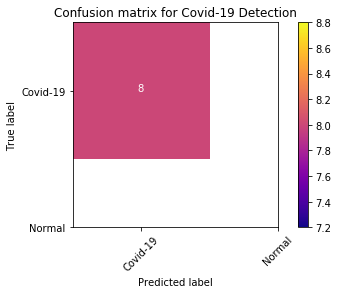

In [73]:
plt.figure()
plot_confusion_matrix(con_matrix, classes=class_names,
                      title='Confusion matrix for Covid-19 Detection',cmap="plasma")

# List all data in History

In [75]:
history = model_fit
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


# Summarize the history for accuracy

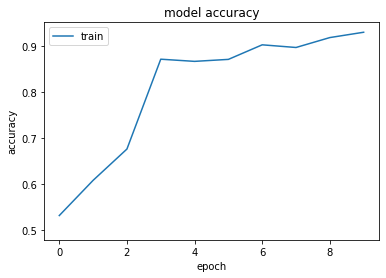

In [82]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# Summarize history for loss

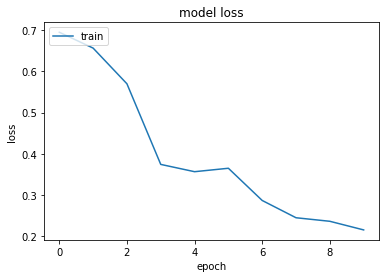

In [81]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# Predictions 

Prediction Of Our Model :  Positive For Covid-19


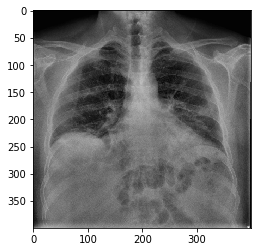

In [89]:
import numpy as np

import cv2
from keras.preprocessing import image
xtest_image = image.load_img('dataset/Prediction/0a7faa2a.jpg', target_size = (224, 224))
xtest_image = image.img_to_array(xtest_image)
xtest_image = np.expand_dims(xtest_image, axis = 0)
results = model.predict_classes(xtest_image)

# training_set.class_indices
imggg = cv2.imread('dataset/Prediction/0a7faa2a.jpg')

imggg = np.array(imggg)
imggg = cv2.resize(imggg,(400,400))
plt.imshow(imggg)

#print(results)
if results[0][0] == 0:
    prediction = 'Positive For Covid-19'
else:
    prediction = 'Negative for Covid-19'
print("Prediction Of Our Model : ",prediction)

Prediction Of Our Model :  Negative for Covid-19


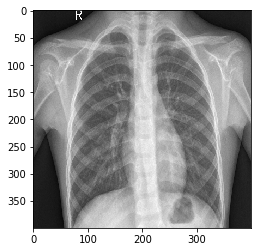

In [90]:
import numpy as np

import cv2
from keras.preprocessing import image
xtest_image = image.load_img('dataset/Prediction/IM-0001-0001.jpeg', target_size = (224, 224))
xtest_image = image.img_to_array(xtest_image)
xtest_image = np.expand_dims(xtest_image, axis = 0)
results = model.predict_classes(xtest_image)

# training_set.class_indices
imggg = cv2.imread('dataset/Prediction/IM-0001-0001.jpeg')

imggg = np.array(imggg)
imggg = cv2.resize(imggg,(400,400))
plt.imshow(imggg)

#print(results)
if results[0][0] == 0:
    prediction = 'Positive For Covid-19'
else:
    prediction = 'Negative for Covid-19'
print("Prediction Of Our Model : ",prediction)